<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            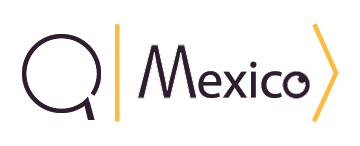
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Circuitos y compuertas cuánticas</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Diego Aguilar Muñoz</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
2. [Circuitos cuánticos](#secc1)
   1. [Implementación en Qiskit](#secc1.1)
   2. [Visalización de un circiuto](#secc1.2)
3. [Compuertas de 1 qubit](#secc2)
   1. [Compuerta *X*](#secc2.1)
   2. [Compuerta *Z*](#secc2.2)
   3. [Compuerta *Y*](#secc2.3)
   4. [Compuerta *H*](#secc2.4)
4. [Compuertas de múltiples qubits](#secc3)
   1. [Compuerta *CNOT*](#secc3.1)
       1. [Estados entrelazados](#secc3.1.1)
   2. [Compuertas controladas](#secc3.2)
   3. [Compuerta *Swap*](#secc3.3)
   4. [Compuerta *Toffoli*](#secc3.4)
5. [Compuertas no unitarias](#secc4)
   1. [Mediciones](#secc4.1)
   2. [Reset](#secc4.2)
   3. [Operadores condicionales](#secc4.3)
6. [Representación geométrica](#secc5)
   1. [Esfera de Bloch](#secc5.1)
       1. [Compuertas en la esfera de Bloch](#secc5.1.1)
   2. [QSphere](#secc5.2)
7. [Referencias](#ref)


<a id="intro"></a>
# Introducción

En computación clásica, la unidad fundamental de información se conoce como *bit* y puede tomar 2 valores: 0 y 1. En el caso de la computación cuántica se tiene un concepto análogo conocido como **Qubit**. El qubit es un sistema cuántico que tiene 2 estados: $\ket{0}$ y $\ket{1}$. Sin embargo, la principal diferencia con el bit es que el qubit puede encontrarse como una combinación lineal de los estados, es decir:

$$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$$

donde $\alpha$ y $\beta$ son números complejos cualesquiera tales que $|\alpha|^2 + |\beta|^2 = 1$. Esta combinación lineal es conocida como superposición de estados. Es importante recalcar que $\alpha$ y $\beta$ tienen significado físico, el módulo al cuadrado de cada unos de estos valores representa la probabilidad de obtener el valor correspondiente a ese estado. En otras palabras, si nos tomamos el estado mencionado anteriormente, al medir tendremos una probabilidad de $|\alpha|^2$ de medir $\ket{0}$ y una probabilidad de $|\beta|^2$ de medir $\ket{1}$.

In [1]:
# Importamos las herramientas necesarias para este notebook
import qiskit
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import matplotlib.pyplot as plt

# actualmente la versión de matplotlib usada por Qiskit 0.28.0 muestra un mensaje de advertencia (deprecation), 
# lo suprimimos por comodidad
import warnings
warnings.filterwarnings("ignore")

<a id="secc1"></a>
# Circuitos cuánticos

Para poder realizar operaciones en computación clásica, fundamentalmente se cuenta con una serie de cables y compuertas lógicas, esto es conocido como circuito. De la misma forma, en computación cuántica se utilizan circuitos para poder realizar operaciones e implementar algoritmos, esto por medio de compuertas aplicadas a algoritmos. En general un circuito cuántico se conforma por 2 partes principales, un grupo de qubits sobre los que se aplicarán las mediciones y un grupo de bits clásicos donde se almacenarán las mediciones de cada uno de los qubits, incluso se puede condicionar la aplicación de ciertas compuertas cuánticas al valor de algún bit clásico.

<a id="secc1.1"></a>
## Implementación en Qiskit

Para definir un circuito cuántico se utiliza la clase `QuantumCircuit`. Al construir una instancia de esta clase le enviamos el número de qubits y bits clásicos a utilizar. Existen 2 formas de definir los registros, ya sea escribiendo el número de qubits seguido por el número de bits, por ejemplo `QuantumCircuit(2,2)` define un circuito de 2 qubits y 2 bits.
Otra forma es definiendo por separado los registros utilizando `QuantumRegister` y `ClassicalRegister` donde el argumento es el número de qubits y bits respectivamente. Si se agrega un segundo argumento es el nombre de los qubits en ese registro. Es importante que notes que cada uno de los qubits y bits clásicos asociados tienen una posición definida empezando por 0. Esto es útil para designar el qubit sobre el cual se va a aplicar alguna compuerta. 

Finalmente, por defecto todos los qubits están inicializados en el estado $\ket{0}$. Sin embargo, se puede utilizar el método `initialize()` para cambiar este estado. Este método toma 2 argumentos, el primero es el estado que con el cual se quiere inicializar el qubit y el segundo argumento es el qubit que se busca inicializar. El estado inicial se define como un vector de 2 entradas. Recordando que $\ket{0} = \left( \begin{matrix} 1 \\ 0 \\\end{matrix} \right)$ y $\ket{1} = \left( \begin{matrix} 0 \\ 1 \\\end{matrix} \right)$.

A continuación realizamos un ejemplo de un circuito de 2 qubits y 2 bits clásicos con el segundo qubit inicializado en $\ket{1}$

In [2]:
# Definimos un registro cuántico de 2 qubits con nombre 'qubit' y un registro clásico de 2 bits
q = QuantumRegister(2, name='qubit')
c = ClassicalRegister(2, name='bit')


# Definimos como qc al circuito cuántico con los registros definidos anteriormente.
qc = QuantumCircuit(q,c, name='Circuito') 

#Definimos el estado |1>
init = [0,1]

#Inicializamos el segundo qubit en el estado |1>
qc.initialize(init, 1)

<a id="secc1.2"></a>
## Visualización de un circiuto

Para facilitar la construcción de un circuito cuántico, se tienen diferentes herramientas de visualización. La más básica es utilizando la función `print()` y toma como argumento el nombre del circuito qe se busca visualizar. Este circuito se mostrará como un archivo de texto en código ASCII. Por ejemplo, podemos utilizarla para visualizar el circuito definido en el ejemplo anterior.

In [3]:
print(qc)

                            
qubit_0: ───────────────────
         ┌─────────────────┐
qubit_1: ┤ Initialize(0,1) ├
         └─────────────────┘
  bit: 2/═══════════════════
                            


Otra forma de visualizar el circuito es utilizando el método `draw()` sobre el circuito que se quiere observar. Si no se coloca un argumento, el circuito se visualizará como un archivo de texto. Sin embargo, existen 2 opciones de salida alternativas que pueden ser de gran utilidad. La primera es utilizando la biblioteca de Python **matplotlib** y la segunda ocupa el sistema de composición de textos **LaTeX**. Para decidir cual utilizar se pueden definir los valores `mpl` y `latex` para el parámetro `output`. Si se quiere el código de LaTeX que genera el circuito se utiliza `latex_source`.

Existen diferentes parámetros que se pueden modificar en el argmento del método `draw()` para cambiar el aspecto de la salida. Por ejemplo el parámetro `scale` que funciona para reducir o aumentar el tamaño de la imagen de salida, o `reverse_bits` para invertir el orden de los qubits. Si quieres obtener más información de todos los parámetros que se pueden utilizar puedes consultar la <a href="https://qiskit.org/documentation/stubs/qiskit.visualization.circuit_drawer.html">documentación de Qiskit</a>. Si se prefiere utilizar una función en lugar de un método, `qiskit.tools.visualization` nos ofrece la función `circuit_drawer()`, la cual funciona igual que el método `draw()`, donde toma como argumento principal el circuito que se quiere visualizar y se agregan los mismos parámetros que `draw()`.

Uno de los parámetros más interesantes es `style` ya que cuenta con diferentes opciones para poder personalizar la imagen de salida, por ejemplo `backgroundcolor` define el color de fondo del archivo, por defecto el color es blanco. También se puede modificar el color del texto utilizando `textcolor`, si se quieren conocer todos los detalles que se pueden personalizar puedes consultar el siguiente <a href="https://qiskit.org/documentation/stubs/qiskit.visualization.qcstyle.DefaultStyle.html#qiskit.visualization.qcstyle.DefaultStyle">enlace</a>.

Un ejemplo de personalización de la salida de un circuito es:

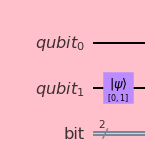

In [4]:
#Definimos la variable style donde se marcan los aspectos estéticos que se quieren cambiar
style = {'backgroundcolor': 'pink', 'textcolor': '#3B3131'}

#Dibujamos el circuito utilizando Matplotlib y el estilo definido anteriormente
qc.draw(output='mpl', style=style)

<a id="secc2"></a>
# Compuertas de 1 qubit

En computación clásica se ocupan compuertas lógicas con la intención de modificar el valor del bit y así poder implementar diferentes algoritmos, existen 2 tipos de compuertas: las de un solo bit y las compuertas múltiples. Un ejemplo es la compuerta *NOT*, la cual convierte un bit 0 en 1 y viceversa.

En el caso de computación cuántica se tiene un análogo, a continuación conoceremos las compuertas unitarias más utilizadas.

<a id="secc2.1"></a>
## Compuerta *X*

La compuerta *X* es una de las 3 matrices de Pauli (*X*, *Y* y *Z*), su representación matemática está dada por:

$$ X = \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
        \end {pmatrix} = \ket{0}\bra{1} + \ket{1}\bra{0} $$

Podemos observar que al aplicarla a los estados $\ket{0}$ y $\ket{1}$ se obtiene:

$$\begin{align*} X\ket{0} & = \ket{1} \\
X\ket{1} & = \ket{0} \end{align*}$$

Podemos notar que la compuerta cambia el estado $\ket{0}$ a $\ket{1}$ y viceversa, es por esto que esta compuerta también se conoce como **bit-flip gate**.

Su implementación en Qiskit está dada por el método `x()` donde el argumento es el qubit sobre el cual se quiere implementar la compuerta, por ejemplo:

In [5]:
#Definimos un circuito de 1 qubit
qc = QuantumCircuit(1)

#Aplicamos la compuerta X al qubit
qc.x(0)

#Dibujamos el circuito
qc.draw('latex')

<a id="secc2.2"></a>
## Compuerta *Z*

La representación matemática de la compuerta *Z*, también conocida como **phase-flip gate** está dada por:

$$ Z = \begin{pmatrix}
        1 & 0 \\
        0 & -1 \\
        \end {pmatrix} = \ket{0}\bra{0} - \ket{1}\bra{1} $$

Podemos observar que al aplicarla a los estados $\ket{0}$ y $\ket{1}$ se obtiene:


$$\begin{align*} Z\ket{0} & = \ket{0} \\
Z\ket{1} & = -\ket{1} \end{align*}$$

De manera análoga a la compuerta *X*, se implementa en Qiskit por medio del método `z()` donde el argumento es el qubit sobre el cual se quiere implementar la compuerta.


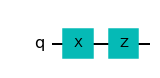

In [6]:
# Aplicamos la compuerta Z en el circuito definido en el ejemplo anterior
qc.z(0)

# Dibujamos el circuito
qc.draw('mpl')

<a id="secc2.3"></a>
## Compuerta *Y*

Finalmente la última de las compuertas de Pauli es la compuerta *Y* también conocida como *bit- and phase-flip gate*, esto se debe a que realiza la misma operación que si se aplicaran las 2 compuertas anteriores. Su representación matemática está dada por:

$$ Y = \begin{pmatrix}
        0 & -i \\
        i & 0 \\
        \end {pmatrix} = -i\ket{0}\bra{1} + i\ket{1}\bra{0} $$

Al aplicarla a los estados $\ket{0}$ y $\ket{1}$ se obtiene:


$$\begin{align*} Y\ket{0} & = i\ket{1} \\
Y\ket{1} & = -i\ket{0} \end{align*}$$

Se implementa en Qiskit por medio del método `y()` donde el argumento es el qubit sobre el cual se quiere implementar la compuerta.

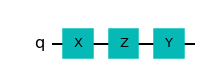

In [7]:
# Aplicamos la compuerta Y en el circuito definido en el ejemplo anterior
qc.y(0)

# Dibujamos el circuito
qc.draw('mpl')

<a id="secc2.4"></a>
## Compuerta Hadamard

La compuerta Hadamard es una de las compuertas fundamentales de la computación cuántica. Esta compuerta genera una superposición entre los 2 estados. Su representación matemática está dada por:

$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix}
        1 & 1 \\
        1 & -1 \\
        \end {pmatrix}$$

Al aplicarla sobre los estados $|0>$ y $|1>$ se obtienen los estados $|+>$ y $|->$ respectivamente:

$$ \begin{align*} H|0> & = \frac{1}{\sqrt{2}} \left( |0> + |1> \right) = |+> \\
                H|1> & = \frac{1}{\sqrt{2}} \left( |0> - |1> \right) = |-> \end{align*} $$

Su implementación en Qiskit está dada por el método `h()` y, al igual que las compuertas anteriores, su argumento está dado por el número de qubit sobre el cual se aplica la compuerta.

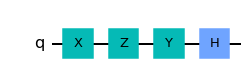

In [8]:
# Aplicamos la compuerta Y en el circuito definido en el ejemplo anterior
qc.h(0)

# Dibujamos el circuito
qc.draw('mpl')

<a id="secc3"></a>
# Compuertas de múltiples qubits

Un sistema de múltiples qubits se representa por el producto tensorial de cada uno de los elementos, por lo que se tendrían $2^n$ elementos que forman los estados, donde $n$ es el número de qubits. Por ejemplo, si se tiene un estado de 2 qubits, se tienen 4 elementos dados por:

 $$\begin{align*} \ket{00} & = \ket{0} \otimes \ket{0} = \begin{pmatrix} 1 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 0 \begin{pmatrix} 1 \\ 0 \end{pmatrix}  \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \\
 \ket{01} & = \ket{0} \otimes \ket{1} = \begin{pmatrix} 1 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\ 0 \begin{pmatrix} 0 \\ 1 \end{pmatrix}  \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} \\ 
 \ket{10} & = \ket{1} \otimes \ket{0} = \begin{pmatrix} 0 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 1 \begin{pmatrix} 1 \\ 0 \end{pmatrix}  \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} \\
\ket{11} & = \ket{1} \otimes \ket{1} = \begin{pmatrix} 0 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\ 1 \begin{pmatrix} 0 \\ 1 \end{pmatrix}  \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} \\  \end{align*} $$

De manera análoga una compuerta de 2 qubits está dada por:

$$ A \otimes B = \begin{pmatrix} A_{00} \begin{pmatrix} B_{00} && B_{01} \\ B_{10} && B_{11} \end{pmatrix} && A_{01} \begin{pmatrix} B_{00} && B_{01} \\ B_{10} && B_{11} \end{pmatrix} \\ A_{10} \begin{pmatrix} B_{00} && B_{01} \\ B_{10} && B_{11} \end{pmatrix} && A_{11} \begin{pmatrix} B_{00} && B_{01} \\ B_{10} && B_{11} \end{pmatrix} \end{pmatrix}$$

<a id="secc3.1"></a>
## Compuerta *CNOT*

La gran mayoría de las compuertas de 2 qubits son controladas, estas se componen de 2 partes, un qubit de control y un objetivo. Si el qubit de control se encuentra en el estado $ |1> $ se aplica la compuerta unitaria sobre el qubit objetivo. Si el qubit de control se encuentra en el estado |0>, no se aplica ninguna compuerta unitaria sobre el qubit objetivo. 

Uno de los principales es la compuerta *CNOT*, la cual niega el qubit objetivo si el qubit control se encuentra en el estado $|1>$, es decir aplica una compuerta *X*. Es decir: $$ |00> \Rightarrow |00>\\|01> \Rightarrow |01> \\ |10> \Rightarrow |01>\\ |11> \Rightarrow |10> $$

Su representación matemática está dada por:

$$ C_X = \begin{pmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && 1 \\ 0 && 0 && 1 && 0 \end{pmatrix} $$

Su implementación en Qiskit está dada por el método `cx()` donde el primer argumento es el qubit de control y el segundo argumento es el qubit objetivo, por ejemplo:

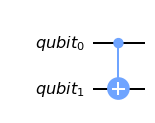

In [9]:
#Definimos el circuito de 2 qubits
circuito = QuantumCircuit(q)

#Aplicamos la compuerta CNOT con el primer qubit de control y el segundo objetivo
circuito.cx(0,1)

#Dibujamos el circuito
circuito.draw(output='mpl')

<a id="secc3.1.1"></a>
### Estados entrelazados

Si nos tomamos el estado $\ket{00}$, podemos aplicar una compuerta *Hadamard* sobre el primer qubit recordando que $\ket{00} = \ket{0} \otimes \ket{0}$, por lo tanto 

$$ \begin{align*} H \otimes I \ket{0} \otimes \ket{0} & = \frac{1}{\sqrt{2}}\left( \ket{0} + \ket{1} \right)\otimes \ket{0} \\ & = \frac{1}{\sqrt{2}}\left( \ket{00} + \ket{10} \right) \end{align*} $$

Y ahora podemos aplicar una compuerta *CNOT* recordando que $\ket{00} \Rightarrow \ket{00}$ y $\ket{10} \Rightarrow \ket{11}$ por lo que el estado final es: $$\ket{\psi} = \frac{1}{\sqrt{2}}\left( \ket{00} + \ket{11} \right) $$

Este es conocido como *Estado de Bell* y una de las peculiaridades más grande que tiene es que este estado no puede ser separado como el producto tensorial de 2 qubits, esto hace que se considere un estado entrelazado. Estos estados entrelazados son pieza fundamental de la computación cuántica y van a ser muy útiles para desarrollar diferentes algoritmos que implementaremos en futuros notebooks. (Si quieres obtener mayor información sobre los estados entrezados puedes revisar [[4](#ref)].

Ahora podemos observar su implementación en Qiskit:

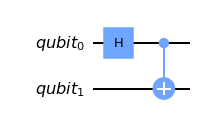

In [10]:
#Definimos el circuito de 2 qubits
circuito = QuantumCircuit(q)

#Generamos nuestro estado entrelazado
circuito.h(0)
circuito.cx(0,1)

#Dibujamos el circuito
circuito.draw(output='mpl')

<a id="secc3.2"></a>
## Compuertas controladas

De manera análoga a la compuerta CNOT, el resto de las compuertas de 1 qubit también tienen un análogo controlado: *CY*, *CZ* y *C-Hadamard*. Su representación matemática está dada por:

$$\begin{align*} C_Y & = \begin{pmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && -i \\ 0 && 0 && i && 0 \end{pmatrix} \\
C_Z & = \begin{pmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 1 && 0 \\ 0 && 0 && 0 && -1 \end{pmatrix} \\
C_H &= \begin{pmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && \frac{1}{\sqrt{2}} && \frac{1}{\sqrt{2}} \\ 0 && 0 && \frac{1}{\sqrt{2}} && -\frac{1}{\sqrt{2}} \end{pmatrix} \end{align*}$$

Su implementación en qiskit está dado por los métodos `cy()`, `cz()` y `ch()` respectivamente. El primer argumento, al igual con la compuerta *CNOT*, representa el qubit de control y el segundo el qubit objetivo.

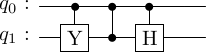

In [11]:
#Definimos el circuito de 2 qubits
circuito = QuantumCircuit(2)

#De manera análoga a la compuerta CNOT aplicamos las compuerta CY, CZ y C-Hadamard
circuito.cy(0,1)
circuito.cz(0,1)
circuito.ch(0,1)

#Dibujamos el circuito
circuito.draw(output='latex')

<a id="secc3.3"></a>
## Compuerta *Swap*

La compuerta *Swap* consiste en intercambiar los 2 qubits, es decir:
$$ \ket{00} \Rightarrow \ket{00} \\  \ket{01} \Rightarrow \ket{10} \\ \ket{10} \Rightarrow \ket{01} \\ \ket{11} \Rightarrow \ket{11} $$

Y su representación matemática está dada por: $$ SWAP = \begin{pmatrix} 1 && 0 && 0 && 0 \\ 0 && 0 && 1 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && 1 \end{pmatrix}$$

Su implementación en Qiskit está dada por el método `swap()`, donde los argumentos son los qubits a intercambiar

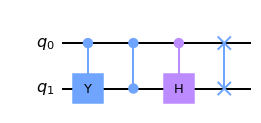

In [12]:
# Implementamos la compuerta Swap
circuito.swap(0,1)

#Dibujamos el circuito
circuito.draw(output='mpl')

<a id="secc3.4"></a>
## Compuerta *Toffoli*

Si se cuenta con 3 qubits, la representación matemática de una compuerta será una matriz de 8x8. La compuerta de 3 qubits más utilizada es una compuerta *X* con 2 qubits de control, esta es conocida como compuerta *Toffoli* y su representación matemática está dada por:

$$ C_{C_X} = \begin{pmatrix} 1 && 0 && 0 && 0 && 0 && 0 && 0 && 0 \\
0 && 1 && 0 && 0 && 0 && 0 && 0 && 0  \\ 0 && 0 && 1 && 0 && 0 && 0 && 0&& 0 \\ 0 && 0 && 0 && 1 && 0 && 0 && 0 && 0  \\ 0 && 0 && 0 && 0 && 1 && 0 && 0 && 0 \\ 0 && 0 && 0 && 0 && 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && 0 && 0 && 0 && 0 && 1 \\ 0&& 0 && 0 && 0 && 0 && 0 && 1 && 0\end{pmatrix} $$

Su implementación en Qiskit es utilizando el método `ccx()` que toma 3 argumentos, los primeros 2 son los qubits de control y el tercero es el qubit objetivo.

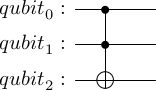

In [13]:
#Definimos un registro de 3 qubits
q = QuantumRegister(3, name='qubit')

#Definimos un circuito de 3 qubits
circ = QuantumCircuit(q)

#Aplicamos la compuerta Toffoli
circ.ccx(0,1,2)

#Dibujamos el circuito
circ.draw(output='latex')

<a id="secc4"></a>
# Compuertas no unitarias

<a id="secc4.1"></a>
## Mediciones

Ya hemos visto diferentes compuertas con las que podemos manipular nuestros qubits y así generar superposiciones, sin embargo, físicamente nosotros no podemos observar esta superposición lo que nosotros podemos hacer es tomar una medición múltiples veces para así poder conocer las probabilidades de obtener cada uno de los estados. 

Para tomar una medición en Qiskit se utiliza el método `measure()` donde el primer argumento es el qubit que se busca medir y el segundo es el bit sobre el cual se almacena la medición, por ejemplo:

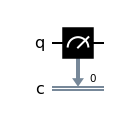

In [14]:
#Definimos un circuito de 1 qubit y 1 bit
qc = QuantumCircuit(1,1)

#Medimos el qubit 0 y se almacena en el bit 0
qc.measure(0,0)

#Dibujamos el circuito
qc.draw(output='mpl')

<a id="secc4.2"></a>
## Reset

Es importante recordar que al tomar una medición, ese qubit va a colapsar en cierto estado ($\ket{0}$ o $\ket{1}$), por lo que si se quiere seguir operando con él, no se puede estar completamente seguro con que estado base se está trabajando si se contaba con una superposición antes de la medición. Es por esto que puede resultar útil reiniciar el qubit al estado $\ket{0}$ después de una medición, esto es posible en Qiskit utilizando el método `reset()` que toma como argumento el qubit que se busca reiniciar. Por ejemplo, podemos aplicarla al circuito anterior después de la medición:

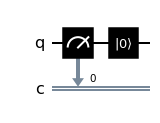

In [15]:
##Reiniciamos el qubit en el estado 0
qc.reset(0)

##Dibujamos el circuito
qc.draw(output='mpl')

<a id="secc4.3"></a>
## Operadores condicionales

Anteriormente hablamos de las compuertas controladas y cómo podemos condicionar la aplicación de una compuerta al estado de un qubit. Sin embargo, también se pueden condicionar compuertas unitarias a los valores almacenados en los bits clásicos, para implementarlo en Qiskit se ocupa el método `c_if()` donde el argumento contiene primero el registro clásico sobre el cual se va a condicionar y el segundo argumento representa el valor que debe tener el bit. Por ejemplo:

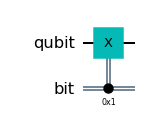

In [16]:
#Definimos los registros
q = QuantumRegister(1, name='qubit')
c = ClassicalRegister(1, name='bit')

#Definimos un registro de 1 qubit y 1 bit
qc = QuantumCircuit(q, c)

#Condicionamos una compuerta X si el bit tiene valor 1
qc.x(q[0]).c_if(c, 1)

#Dibujamos el circuito
qc.draw(output='mpl')

<a id="secc5"></a>
# Representación geométrica

A lo largo de este notebook hemos analizado diferentes compuertas y su representación matemática, pero existe una representación geométrica que puede resultar más útil para comprender la acción de algunas de las compuertas que mencionamos anteriormente y podremos introducir nuevas compuertas basadas en esta representación.

<a id="secc5.1"></a>
## Esfera de Bloch

Sabemos que en general un qubit está dado por $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ y sabemos que no podemos medir una fase global, solo podemos medir la diferencia de fase entre el estado $\ket{0}$ y $\ket{1}$, por lo que podemos reducir a $\alpha$ y $\beta$ como números reales con una diferencia de fase compleja en el estado $\ket{1}$, es decir:

$$\ket{\psi} = \alpha \ket{0} + e^{i\phi} \beta \ket{1} $$

Donde $\alpha$, $\beta$, $\phi$ son números reales y como $\alpha$ y $\beta$ están normalizadas por lo que $\sqrt{\alpha^2+\beta^2} = 1$. Pero también podemos recordar la identidad trigonométrica $\sqrt{\sin{\theta}^2+\cos{\theta}^2} = 1$, por lo que podemos escribir $\alpha$ y $\beta$ en términos de una sola variable como:

$$ \alpha = \cos{\frac{\theta}{2}} \\ \beta = \sin{\frac{\theta}{2}}$$

Por lo que nuestro estado $\ket{\psi}$ está dado por:

$$\ket{\psi} = \cos{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin{\frac{\theta}{2}} \ket{1} $$

Con esta expresión podemos observar que $\ket{\psi}$ está dada por una esfera unitaria, esta representación es conocida como *Esfera de Bloch*

<a id="secc5.1.1"></a>
### Compuertas en la esfera de Bloch

Desde el punto de vista geométrico, el aplicar una compuerta lógica sobre un qubit genera una rotación sobre la esfera de Bloch. Es por esto que las compuertas de Pauli (*X*, *Y*, *Z*) llevan ese nombre, ya que producen una rotación de un ángulo $\pi$ alrededor del respectivo eje que lleva su nombre. Por otro lado, la compuerta *Hadamard* genera una rotación de $\frac{\pi}{2}$ alrededor del eje *Y* seguido por una rotación de $\pi$ alrededor del eje *X*. 

Es importante notar que si se quiere visualizar un sistema de múltiples qubits en la esfera de Bloch, se deberá separar el estado en su producto tensorial y visualizar cada estado por separado.

Qiskit nos ofrece herramientas para poder visualizar estas rotaciones, sin embargo en este notebook no entraremos en mucho detalle ya que serán analizadas con mayor detalle en la sección de Qiskit Aer. Sin embargo, en la siguiente celda vamos a generar un sistema de 4 qubits donde apliquemos cada una de las compuertas para poder observar la rotación.

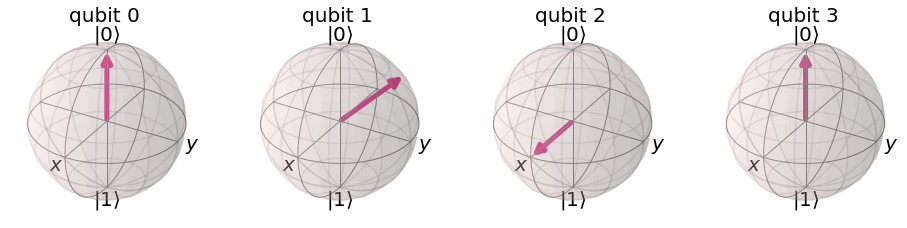

In [17]:
# Generamos un circuito de 4 qubits
x = QuantumRegister(1, name='x')
y = QuantumRegister(1, name='y')
z = QuantumRegister(1, name='z')
h = QuantumRegister(1, name='h')

qc = QuantumCircuit(x,y,z,h)

# El segundo qubit se inicializará en un estado con ángulo theta igual a 45 para observar la rotación sobre el eje
# Y, la compuerta utilizada será descrita más adelante
qc.u(1,3*pi/4, 0, 1)


# Aplicamos una compuerta Hadamard al tercer qubit para empezar sobre el eje X y observar las rotaciones respecto
# alrededor del eje Z

qc.h(2)

# Observamos el estado inicial de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

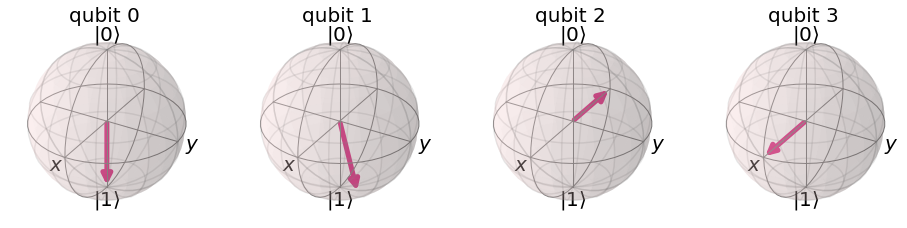

In [18]:
# Aplicamos las compuertas a su respectivo qubit
qc.x(0)     # El vector se moverá del polo norte al polo sur
qc.y(1)     # El vector se moverá del hemisferio norte al sur
qc.z(2)     # El vector se moverá del estado |+> al |->
qc.h(3)     # El vector se moverá del polo norte al estado |+>

# Observamos el estado final de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

Ahora que conocemos la representación geométrica de un qubit, podemos definir una serie de compuertas que pueden ser definidas claramente de acuerdo a la rotación que generan:

* **Compuerta *S***: Genera una rotación de $\frac{\pi}{2}$ sobre el eje Z, también se conoce como $\sqrt{Z}$. Se implementa en Qiskit por medio del método `s()`.

* **Compuerta *T***: Genera una rotación de $\frac{\pi}{4}$ sobre el eje Z, también se conoce como $\sqrt[4]{Z}$. Se implementa en Qiskit por medio del método `t()`.

* **Compuerta *U***: Es la compuerta de rotación más general, ya que toma 3 argumentos $\theta$, $\phi$ y $\lambda$, donde son los <a href="https://en.wikipedia.org/wiki/Euler_angles">ángulos de Euler</a>. Su implementación en Qiskit está dada por el método `u()` que toma 4 argumentos: los primeros 3 son $\theta$, $\phi$ y $\lambda$ respectivamente, finalizando con el número del qubit.

Al igual que con el ejemplo pasado, podemos observar estas rotaciones:

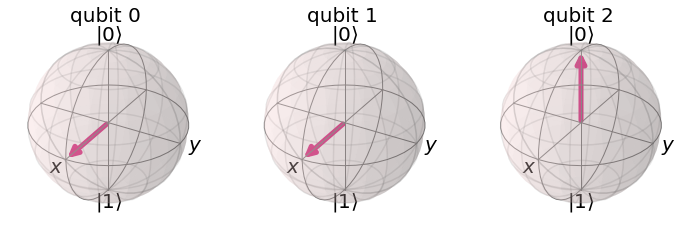

In [19]:
# Generamos un circuito de 4 qubits
s = QuantumRegister(1, name='s')
t = QuantumRegister(1, name='t')
u = QuantumRegister(1, name='u')

qc = QuantumCircuit(s,t,u)

# Aplicamos una compuerta Hadamard al primer y segundo qubit para empezar sobre el eje X y observar las rotaciones respecto
# alrededor del eje Z

qc.h(0)
qc.h(1)

# Observamos el estado inicial de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

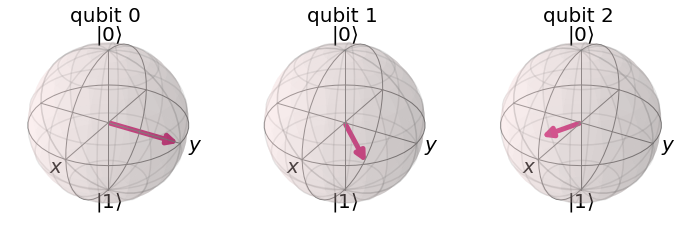

In [20]:
# Aplicamos las compuerta a su respectivo qubit
qc.s(0)
qc.t(1)
qc.u(5, pi, 0.23, 2) #Modifica los argumentos de esta compuerta para obtener diferentes rotaciones

# Observamos el estado final de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

Finalmente, podemos analizar lo que sucede si visualizamos un estado entrelazado

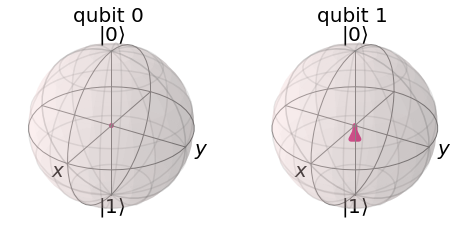

In [21]:
# Definimos nuestro circuito de 2 qubits
qc = QuantumCircuit(2)

# Entrelazamos nuestros qubits
qc.h(0)
qc.cx(0,1)

# Observamos el estado final de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

Podemos notar que no se alcanza a observar ningún estado ya que no podemos separarlo en el producto tensorial de 2 qubits. Por lo que nos conviene buscar otra representación para sistemas de múltiples qubits.

<a id="secc5.2"></a>
## Qsphere

La QSphere nos muestra la información de la probabilidad de medir dicho estado y la fase relativa al estado $\ket{0}^{\otimes n}$ . La probabilidad se representa por el tamaño del punto que marca el estado y la fase relativa por un código de colores mostrado al graficarlo.

Si estamos en un sistema de 1 qubit, al igual que la esfera de Bloch, el polo norte representa el estado $\ket{0}$ y el polo sur el estado $\ket{1}$. Y, por ejemplo, podemos observar la visualización del estado $\ket{-}$.

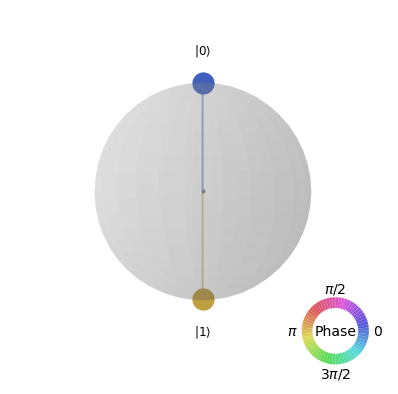

In [22]:
# Definimos nuestro circuito de 1 qubit
qc = QuantumCircuit(1)

# Generamos el estado |-> aplicando una compuerta X seguida por una Hadamard
qc.x(0)
qc.h(0)

# Observamos el estado final de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_state_qsphere(out_state)

Si tenemos un sistema de $n$ qubits, se tienen $2^n$ estados base, por lo que se grafican como puntos distribuidos equitativamente a lo largo de la esfera, con el estado $\ket{0}^{\otimes n}$ como polo norte y el estado $\ket{1}^{\otimes n}$ como polo sur. El resto de los estados se acomodan en la esfera en forma de paralelos.

Como ejemplo podemos observar el estado $\ket{\psi} = \frac{1}{\sqrt{2}} \left( \ket{00} + \ket{10} \right)$

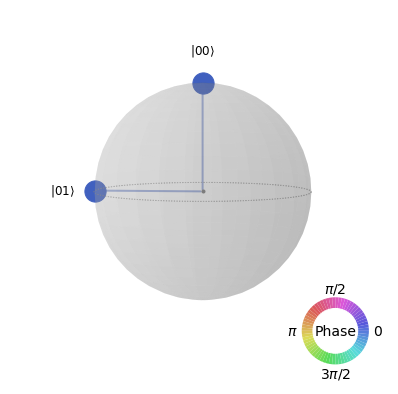

In [23]:
# Definimos un circuito de 2 qubits
qc = QuantumCircuit(2)

# Aplicamos una compuerta Hadamard al primer qubit para llegar al estado deseado
qc.h(0)

# Observamos el estado final de los qubits
state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_state_qsphere(out_state)

<a id="ref"></a>
# Referencias

* [1] Qiskit Development Team. Qiskit Tutotials: Summary of Quantum Operations. Consultado en https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html 
* [2] Qiskit Development Team. Qiskit Tutorials: Visualizing a Quantum Circuit Consultado en https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html
* [3] Nielsen, M. A., & Chuang, I. L. (2019). Quantum computation and quantum information. Cambridge: Cambridge University Press.
* [4] McMahon, D. (2008). Quantum Computing Explained. Hoboken: John Wiley & Sons. 147-159

<table width="100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: right;">
            <a href="02_transpilador.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                Notebook siguiente: Transpilador >>
            </a>
            </div>
        </td>
    </tr>
</table>